### Integrantes:
* Geancarlo Murillo
* Daniel Saigua

### Taller 2
Responder las siguientes preguntas: 
 - Quien trae más dinero a la empresa?
 - Los 10 productos mas rentables
 - Encontrar transacciones sospechosas

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('sales.csv', index_col=0)
df.head()

,ID,Prod,Quant,Val,Insp
1,v1,p1,182.0,1665.0,unkn
2,v2,p1,3072.0,8780.0,unkn
3,v3,p1,20393.0,76990.0,unkn
4,v4,p1,112.0,1100.0,unkn
5,v3,p1,6164.0,20260.0,unkn


### Empleado que trae más dinero

Para obtener el empleado que más dinero ingresa a la empresa, agrupamos por `Id de vendedor` y sumamos `Val` que representa el dinero obtenido por este vendedor. Luego de hacer la suma, obtenemos el `id` que tenga mayor suma

In [6]:
df.groupby('ID')['Val'].sum().idxmax()

'v431'

### Los 10 productos mas rentables

Definimos una métrica para establecer si un producto es rentable, como la relación entre la cantidad vendida y los ingresos obtenidos en las ventas de este. Un producto es rentable si la relación `ingresos obtenidos/unidades vendidas` es mayor.

In [34]:
prods = df.groupby('Prod').sum()

In [35]:
prods['Rentability'] = prods.apply(lambda row: row['Val']/row['Quant'] if row['Quant'] != 0 else 0, axis=1)
prods.head()

,Quant,Val,Rentability
Prod,,,
p1,159111.0,1409340.0,8.857590
p10,48241.0,445170.0,9.228043
p100,678241.0,1824245.0,2.689671
p1000,3842054.0,18127305.0,4.718129
p1001,666927.0,6248195.0,9.368634


Hemos obtenido un `sub dataframe` del original con los datos que nos interesan. Hemos agrupado por producto y sumado la cantidad vendida, el dinero obtenido y creado una nueva columna `Rentability` basados en el analisis anterior. Se procede a ordenar en base a su `Rentabilidad`

In [38]:
rentables = prods.sort_values('Rentability', ascending=False)[:9]
rentables

,Quant,Val,Rentability
Prod,,,
p3689,1451.0,12753160.0,8789.221227
p3682,13206.0,34016270.0,2575.819325
p2451,12645.0,12403455.0,980.897983
p2453,3057.0,2753070.0,900.578999
p2452,16363.0,11323240.0,692.002689
p3679,24696.0,9001545.0,364.494048
p3863,1825.0,605115.0,331.569863
p2459,25647.0,6961965.0,271.453386
p2456,134837.0,34427235.0,255.324837


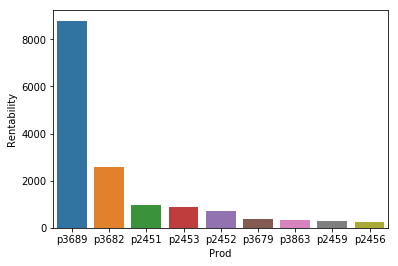

In [49]:
sns.barplot(rentables.index, rentables['Rentability'])


Se aprecia en el grafico de barras la diferencia entre el mas rentable y sus posteriores. Podemos apreciar que el producto `p3689` es, aproximadamente, 4 veces mas rentable que el segundo mas rentable.